## Resume Classification

### Importing all libarities

*** Imports all the necessary libraries for a text preprocessing and analysis project — often used for NLP (Natural Language Processing) tasks such as document analysis, keyword extraction, or text clustering.

In [17]:
## !pip install python-docx docx2txt PyMuPDF mammoth

In [10]:
import zipfile
import os
import docx2txt
import fitz  # PyMuPDF
import mammoth  # For .doc files
from docx import Document
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import matplotlib.pylab as pylab
import seaborn as sns

# 1. Extract the ZIP
zip_path = r"C:\Users\HP\Desktop\Data set.zip"
extract_path = r"C:\Users\HP\Desktop\Data set"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 2. Convert PDF to DOCX
def convert_pdf_to_docx(pdf_path, output_path):
    doc = Document()
    with fitz.open(pdf_path) as pdf:
        for page in pdf:
            text = page.get_text()
            doc.add_paragraph(text)
    doc.save(output_path)

# 3. Read .doc file as plain text
def read_doc_file(doc_path):
    try:
        with open(doc_path, "rb") as doc_file:
            result = mammoth.extract_raw_text(doc_file)
            return result.value.strip()
    except Exception as e:
        return f"Error reading .doc file: {e}"

# 4. Main loop — handle all file types
data = []

for root, dirs, files in os.walk(extract_path):
    for file in files:
        file_path = os.path.join(root, file)
        category = os.path.basename(root)
        ext = file.lower().split(".")[-1]

        text = ""
        try:
            if ext == "docx":
                text = docx2txt.process(file_path)
            elif ext == "pdf":
                # Convert to docx, then read
                temp_docx = os.path.join(root, os.path.splitext(file)[0] + "_fromPDF.docx")
                convert_pdf_to_docx(file_path, temp_docx)
                text = docx2txt.process(temp_docx)
            elif ext == "doc":
                text = read_doc_file(file_path)
        except Exception as e:
            text = f"Error processing file: {e}"

        data.append({
            "filename": file,
            "category": category,
            "content": text.strip()
        })

# 5. Create DataFrame
df = pd.DataFrame(data)
print("✅ DataFrame created with", len(df), "files")
print(df.head())

✅ DataFrame created with 80 files
                                            filename category  \
0   Internship_Ravali_Musquare Technologies (1).docx  Resumes   
1  Internship_Susovan Bag_Musquare Technologies.docx  Resumes   
2                   React Developer_Deepakreddy.docx  Resumes   
3                     React Developer_Haripriya.docx  Resumes   
4               React Developer_Kamalakar Reddy.docx  Resumes   

                                             content  
0  Name: Ravali P \n\n\n\n                       ...  
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...  
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...  
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....  


In [11]:
#Final data set
df

,filename,category,content
0,Internship_Ravali_Musquare Technologies (1).docx,Resumes,Name: Ravali P \n\n\n\n ...
1,Internship_Susovan Bag_Musquare Technologies.docx,Resumes,SUSOVAN BAG \n\nSeeking a challenging po...
2,React Developer_Deepakreddy.docx,Resumes,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...
3,React Developer_Haripriya.docx,Resumes,HARIPRIYA BATTINA \n\nExperience as UI Develop...
4,React Developer_Kamalakar Reddy.docx,Resumes,KAMALAKAR REDDY. A \n\nLinked In: https://www....
...,...,...,...
75,Sri Krishna S_Hexaware.doc,workday resumes,Error reading .doc file: Could not find the bo...
76,Srikanth-Hexaware.docx,workday resumes,Srikanth (WORKDAY hCM Consultant)\t ...
77,SSKumar_Hexaware.docx,workday resumes,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
78,Venkateswarlu B_Hexaware.doc,workday resumes,Error reading .doc file: Could not find main d...


In [12]:
df = df.drop("filename", axis=1)
df

,category,content
0,Resumes,Name: Ravali P \n\n\n\n ...
1,Resumes,SUSOVAN BAG \n\nSeeking a challenging po...
2,Resumes,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...
3,Resumes,HARIPRIYA BATTINA \n\nExperience as UI Develop...
4,Resumes,KAMALAKAR REDDY. A \n\nLinked In: https://www....
...,...,...
75,workday resumes,Error reading .doc file: Could not find the bo...
76,workday resumes,Srikanth (WORKDAY hCM Consultant)\t ...
77,workday resumes,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
78,workday resumes,Error reading .doc file: Could not find main d...


In [13]:
## To check null values 

In [14]:
df.isnull().sum()

category    0
content     0
dtype: int64

In [15]:
df["content"]

0     Name: Ravali P \n\n\n\n                       ...
1     SUSOVAN  BAG   \n\nSeeking  a  challenging  po...
2     Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...
3     HARIPRIYA BATTINA \n\nExperience as UI Develop...
4     KAMALAKAR REDDY. A \n\nLinked In: https://www....
                            ...                        
75    Error reading .doc file: Could not find the bo...
76    Srikanth (WORKDAY hCM Consultant)\t           ...
77    WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
78    Error reading .doc file: Could not find main d...
79    Vinay kumar .v\nWorkday Functional Consultant\...
Name: content, Length: 80, dtype: object

In [16]:
df.category.value_counts().index

Index(['Resumes', 'workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight'],
      dtype='object', name='category')

In [17]:
df.category.value_counts()

category
Resumes                            25
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: count, dtype: int64

## Number of Total Resumes

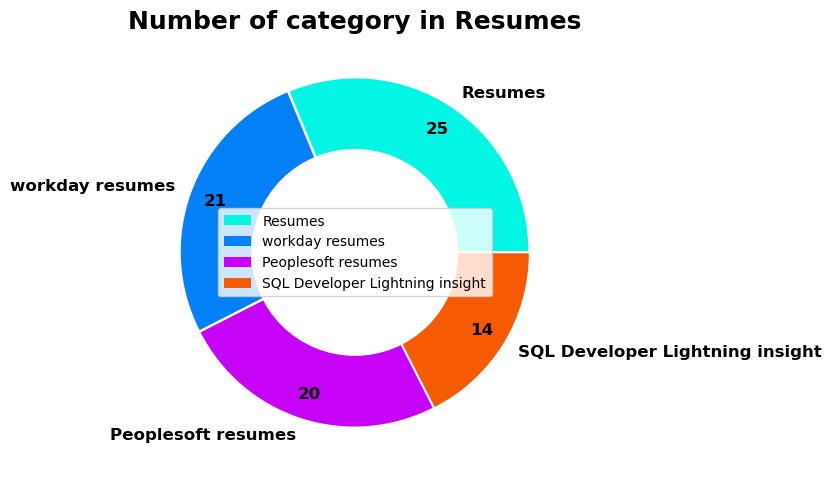

In [18]:
fig = plt.figure(figsize=(8,8))

sizes = df.category.value_counts()
labels = df.category.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of category in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

fig.tight_layout()
plt.show()

In [19]:
df.to_csv('Raw_Resume.csv', index=False)

In [20]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,category,content
0,Resumes,Name: Ravali P \n\n\n\n ...
1,Resumes,SUSOVAN BAG \n\nSeeking a challenging po...
2,Resumes,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...
3,Resumes,HARIPRIYA BATTINA \n\nExperience as UI Develop...
4,Resumes,KAMALAKAR REDDY. A \n\nLinked In: https://www....
...,...,...
75,workday resumes,Error reading .doc file: Could not find the bo...
76,workday resumes,Srikanth (WORKDAY hCM Consultant)\t ...
77,workday resumes,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
78,workday resumes,Error reading .doc file: Could not find main d...


In [21]:
resume_data['Word_Count'] = resume_data['content'].apply(lambda x: len(str(x).split(" ")))
resume_data[['content','Word_Count']].head()

,content,Word_Count
0,Name: Ravali P \n\n\n\n ...,1795
1,SUSOVAN BAG \n\nSeeking a challenging po...,533
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,524
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,404
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,357


In [22]:
resume_data['Char_Count'] = resume_data['content'].str.len() ## this also includes spaces
resume_data[['content','Char_Count']].head()

,content,Char_Count
0,Name: Ravali P \n\n\n\n ...,6175
1,SUSOVAN BAG \n\nSeeking a challenging po...,1901
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,4005
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,2669
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,2672


In [23]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['content'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['content','Stopwords']].head()

,content,Stopwords
0,Name: Ravali P \n\n\n\n ...,179
1,SUSOVAN BAG \n\nSeeking a challenging po...,39
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,138
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,106
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,48


In [24]:
resume_data['Numerics'] = resume_data['content'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['content','Numerics']].head()

,content,Numerics
0,Name: Ravali P \n\n\n\n ...,12
1,SUSOVAN BAG \n\nSeeking a challenging po...,0
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,6
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,6
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,8


In [25]:
resume_data

,category,content,Word_Count,Char_Count,Stopwords,Numerics
0,Resumes,Name: Ravali P \n\n\n\n ...,1795,6175,179,12
1,Resumes,SUSOVAN BAG \n\nSeeking a challenging po...,533,1901,39,0
2,Resumes,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,524,4005,138,6
3,Resumes,HARIPRIYA BATTINA \n\nExperience as UI Develop...,404,2669,106,6
4,Resumes,KAMALAKAR REDDY. A \n\nLinked In: https://www....,357,2672,48,8
...,...,...,...,...,...,...
75,workday resumes,Error reading .doc file: Could not find the bo...,18,91,7,0
76,workday resumes,Srikanth (WORKDAY hCM Consultant)\t ...,1063,6737,194,9
77,workday resumes,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,1076,8329,236,6
78,workday resumes,Error reading .doc file: Could not find main d...,19,100,5,0


## Text Pre-Processing

In [26]:
## Using Regular Expression

In [27]:
## !pip install textblob

In [28]:
import textblob
from textblob import TextBlob
from nltk.tokenize import RegexpTokenizer
import re

In [29]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [30]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.content.apply(lambda x: preprocess(x))

In [31]:
## Clean Text from Resume
resume_data

,category,content,Resume_Details
0,Resumes,Name: Ravali P \n\n\n\n ...,name ravali curriculum vitae specialization co...
1,Resumes,SUSOVAN BAG \n\nSeeking a challenging po...,susovan bag seeking challenging position field...
2,Resumes,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,kanumuru deepak reddy career objective secure ...
3,Resumes,HARIPRIYA BATTINA \n\nExperience as UI Develop...,haripriya battina experience developer reactjs...
4,Resumes,KAMALAKAR REDDY. A \n\nLinked In: https://www....,kamalakar reddy linked professional summary ye...
...,...,...,...
75,workday resumes,Error reading .doc file: Could not find the bo...,error reading doc file could find body element...
76,workday resumes,Srikanth (WORKDAY hCM Consultant)\t ...,srikanth workday hcm consultant seeking suitab...
77,workday resumes,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday hcm fcm name kumar role workday consul...
78,workday resumes,Error reading .doc file: Could not find main d...,error reading doc file could find main documen...


In [32]:
resume_data.drop(['content'], axis = 1, inplace = True)
resume_data

,category,Resume_Details
0,Resumes,name ravali curriculum vitae specialization co...
1,Resumes,susovan bag seeking challenging position field...
2,Resumes,kanumuru deepak reddy career objective secure ...
3,Resumes,haripriya battina experience developer reactjs...
4,Resumes,kamalakar reddy linked professional summary ye...
...,...,...
75,workday resumes,error reading doc file could find body element...
76,workday resumes,srikanth workday hcm consultant seeking suitab...
77,workday resumes,workday hcm fcm name kumar role workday consul...
78,workday resumes,error reading doc file could find main documen...


In [33]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [34]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,category,Resume_Details
0,Resumes,name ravali curriculum vitae specialization co...
1,Resumes,susovan bag seeking challenging position field...
2,Resumes,kanumuru deepak reddy career objective secure ...
3,Resumes,haripriya battina experience developer reactjs...
4,Resumes,kamalakar reddy linked professional summary ye...
...,...,...
75,workday resumes,error reading doc file could find body element...
76,workday resumes,srikanth workday hcm consultant seeking suitab...
77,workday resumes,workday hcm fcm name kumar role workday consul...
78,workday resumes,error reading doc file could find main documen...


In [35]:
resume_data.Resume_Details[5]

'naveen sadhu title software developer location hyderabad india professional summary year overall experience html sql reactjs nodejs experience working application development testing tool hard working enthusiastic excellent communication interpersonal analytical skills strong ability perform part team exceptional ability learn new concepts education bachelor technology computer science engineering marri laxman reddy institute technology management affiliated jntuh skills technology mern stack frameworks framework ides eclipse visual studio code databases sql mongo database operating systems windows unix professional experience current project client inline usa organization edvenswa tech pvt ltd technology mern stack html css bootstrap description project goal provide whenever user wants servicing bike directly application book slot bike servicing whenever customer problem directly book service service provider take bike servicing contribution understand implement features negotiate sc

## N-grams:

In [36]:
## N-grams analyses are often used to see which words often show up together

In [37]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['susovan']),
 WordList(['bag']),
 WordList(['seeking']),
 WordList(['challenging']),
 WordList(['position']),
 WordList(['field']),
 WordList(['science']),
 WordList(['technology']),
 WordList(['utilize']),
 WordList(['skills']),
 WordList(['organization']),
 WordList(['individual']),
 WordList(['growth']),
 WordList(['enhance']),
 WordList(['knowledge']),
 WordList(['academic']),
 WordList(['learning']),
 WordList(['give']),
 WordList(['best']),
 WordList(['organization'])]

In [38]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['susovan', 'bag']),
 WordList(['bag', 'seeking']),
 WordList(['seeking', 'challenging']),
 WordList(['challenging', 'position']),
 WordList(['position', 'field']),
 WordList(['field', 'science']),
 WordList(['science', 'technology']),
 WordList(['technology', 'utilize']),
 WordList(['utilize', 'skills']),
 WordList(['skills', 'organization']),
 WordList(['organization', 'individual']),
 WordList(['individual', 'growth']),
 WordList(['growth', 'enhance']),
 WordList(['enhance', 'knowledge']),
 WordList(['knowledge', 'academic']),
 WordList(['academic', 'learning']),
 WordList(['learning', 'give']),
 WordList(['give', 'best']),
 WordList(['best', 'organization']),
 WordList(['organization', 'skills'])]

In [39]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['susovan', 'bag', 'seeking']),
 WordList(['bag', 'seeking', 'challenging']),
 WordList(['seeking', 'challenging', 'position']),
 WordList(['challenging', 'position', 'field']),
 WordList(['position', 'field', 'science']),
 WordList(['field', 'science', 'technology']),
 WordList(['science', 'technology', 'utilize']),
 WordList(['technology', 'utilize', 'skills']),
 WordList(['utilize', 'skills', 'organization']),
 WordList(['skills', 'organization', 'individual']),
 WordList(['organization', 'individual', 'growth']),
 WordList(['individual', 'growth', 'enhance']),
 WordList(['growth', 'enhance', 'knowledge']),
 WordList(['enhance', 'knowledge', 'academic']),
 WordList(['knowledge', 'academic', 'learning']),
 WordList(['academic', 'learning', 'give']),
 WordList(['learning', 'give', 'best']),
 WordList(['give', 'best', 'organization']),
 WordList(['best', 'organization', 'skills']),
 WordList(['organization', 'skills', 'ccna'])]

In [40]:
## !pip install spacy

In [41]:
## !pip install wordcloud

In [42]:
## !python -m spacy download en_core_web_sm

In [43]:
import nltk
import spacy
import string

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [44]:
### Named Entity Recognition (NER)

In [45]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 338), ('using', 265), ('workday', 232), ('sql', 213), ('application', 210), ('project', 201), ('server', 188), ('data', 180), ('reports', 170), ('peoplesoft', 169), ('business', 165), ('web', 145), ('knowledge', 138), ('react', 138), ('process', 123), ('skills', 122), ('system', 118), ('client', 113), ('good', 108), ('involved', 105), ('developer', 104), ('tools', 102), ('working', 101), ('like', 100), ('database', 99), ('development', 97), ('various', 97), ('creating', 97), ('support', 94), ('hcm', 94), ('services', 93), ('worked', 93), ('integrations', 92), ('technical', 89), ('integration', 87), ('html', 86), ('role', 86), ('servers', 86), ('design', 84), ('report', 83), ('team', 82), ('created', 82), ('people', 81), ('file', 78), ('used', 77), ('css', 73), ('professional', 73), ('studio', 73), ('responsibilities', 72), ('date', 71)]


In [46]:
## Parts Of Speech (POS) Tagging

In [47]:
nlp = spacy.load('en_core_web_sm')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [48]:
for token in doc_block[:30]:
    print(token,token.pos_)  

wledge PROPN
constructor NOUN
good ADJ
knowledge NOUN
abstraction NOUN
good ADJ
knowledge NOUN
encapsulation NOUN
good ADJ
knowledge NOUN
inheritance NOUN
good ADJ
knowledge NOUN
collections NOUN
academic ADJ
projects NOUN
projects VERB
year NOUN
completion NOUN
smart ADJ
farmland PROPN
crop PROPN
prevention PROPN
animal NOUN
intrusion NOUN
detection NOUN
using VERB
cnn PROPN
library NOUN
management NOUN


In [49]:
## Filtering out only the Nouns and Verbs from the Text to Tokens

In [50]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['specialization', 'computer', 'science', 'engg', 'utilize', 'skills', 'achieving', 'target', 'developing', 'performance', 'organization', 'ion', 'ion', 'degree', 'percentage', 'cgpa', 'year', 'passing', 'cgpa', 'diploma', 'examination', 'girls', 'school', 'education', 'board', 'testing', 'skills', 'knowledge', 'sdlc', 'concepts', 'knowledge', 'testing', 'knowledge', 'testing', 'integration', 'testing', 'knowledge', 'system', 'testing', 'knowledge', 'testing', 'reliability', 'testing', 'knowledge', 'testing', 'knowledge', 'stlc', 'concepts', 'knowledge', 'test', 'cases', 'test', 'scenarios', 'knowledge', 'globalization', 'testing', 'compatibility', 'testing', 'knowledge', 'regression', 'testing', 'knowledge', 'test', 'plan', 'goo', 'goo', 'methdology', 'knowledge', 'scrum', 'methodology', 'expertise', 'sprint', 'planning', 'meeting', 'knowledge', 'scrum', 'meeting', 'knowledge', 'sprint', 'meeting', 'knowledge', 'product', 'backlog', 'meeting', 'bug', 'triage', 'meeting', 'knowledge', 

In [51]:
## Counting all the Nouns and Verbs present in the Tokens of words

In [52]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,333
1,using,265
2,application,210
3,project,196
4,server,182
5,data,176
6,reports,170
7,business,163
8,web,139
9,knowledge,136


In [53]:
## Visualizing the Result of Top 20 Nouns and Verbs most Frequently

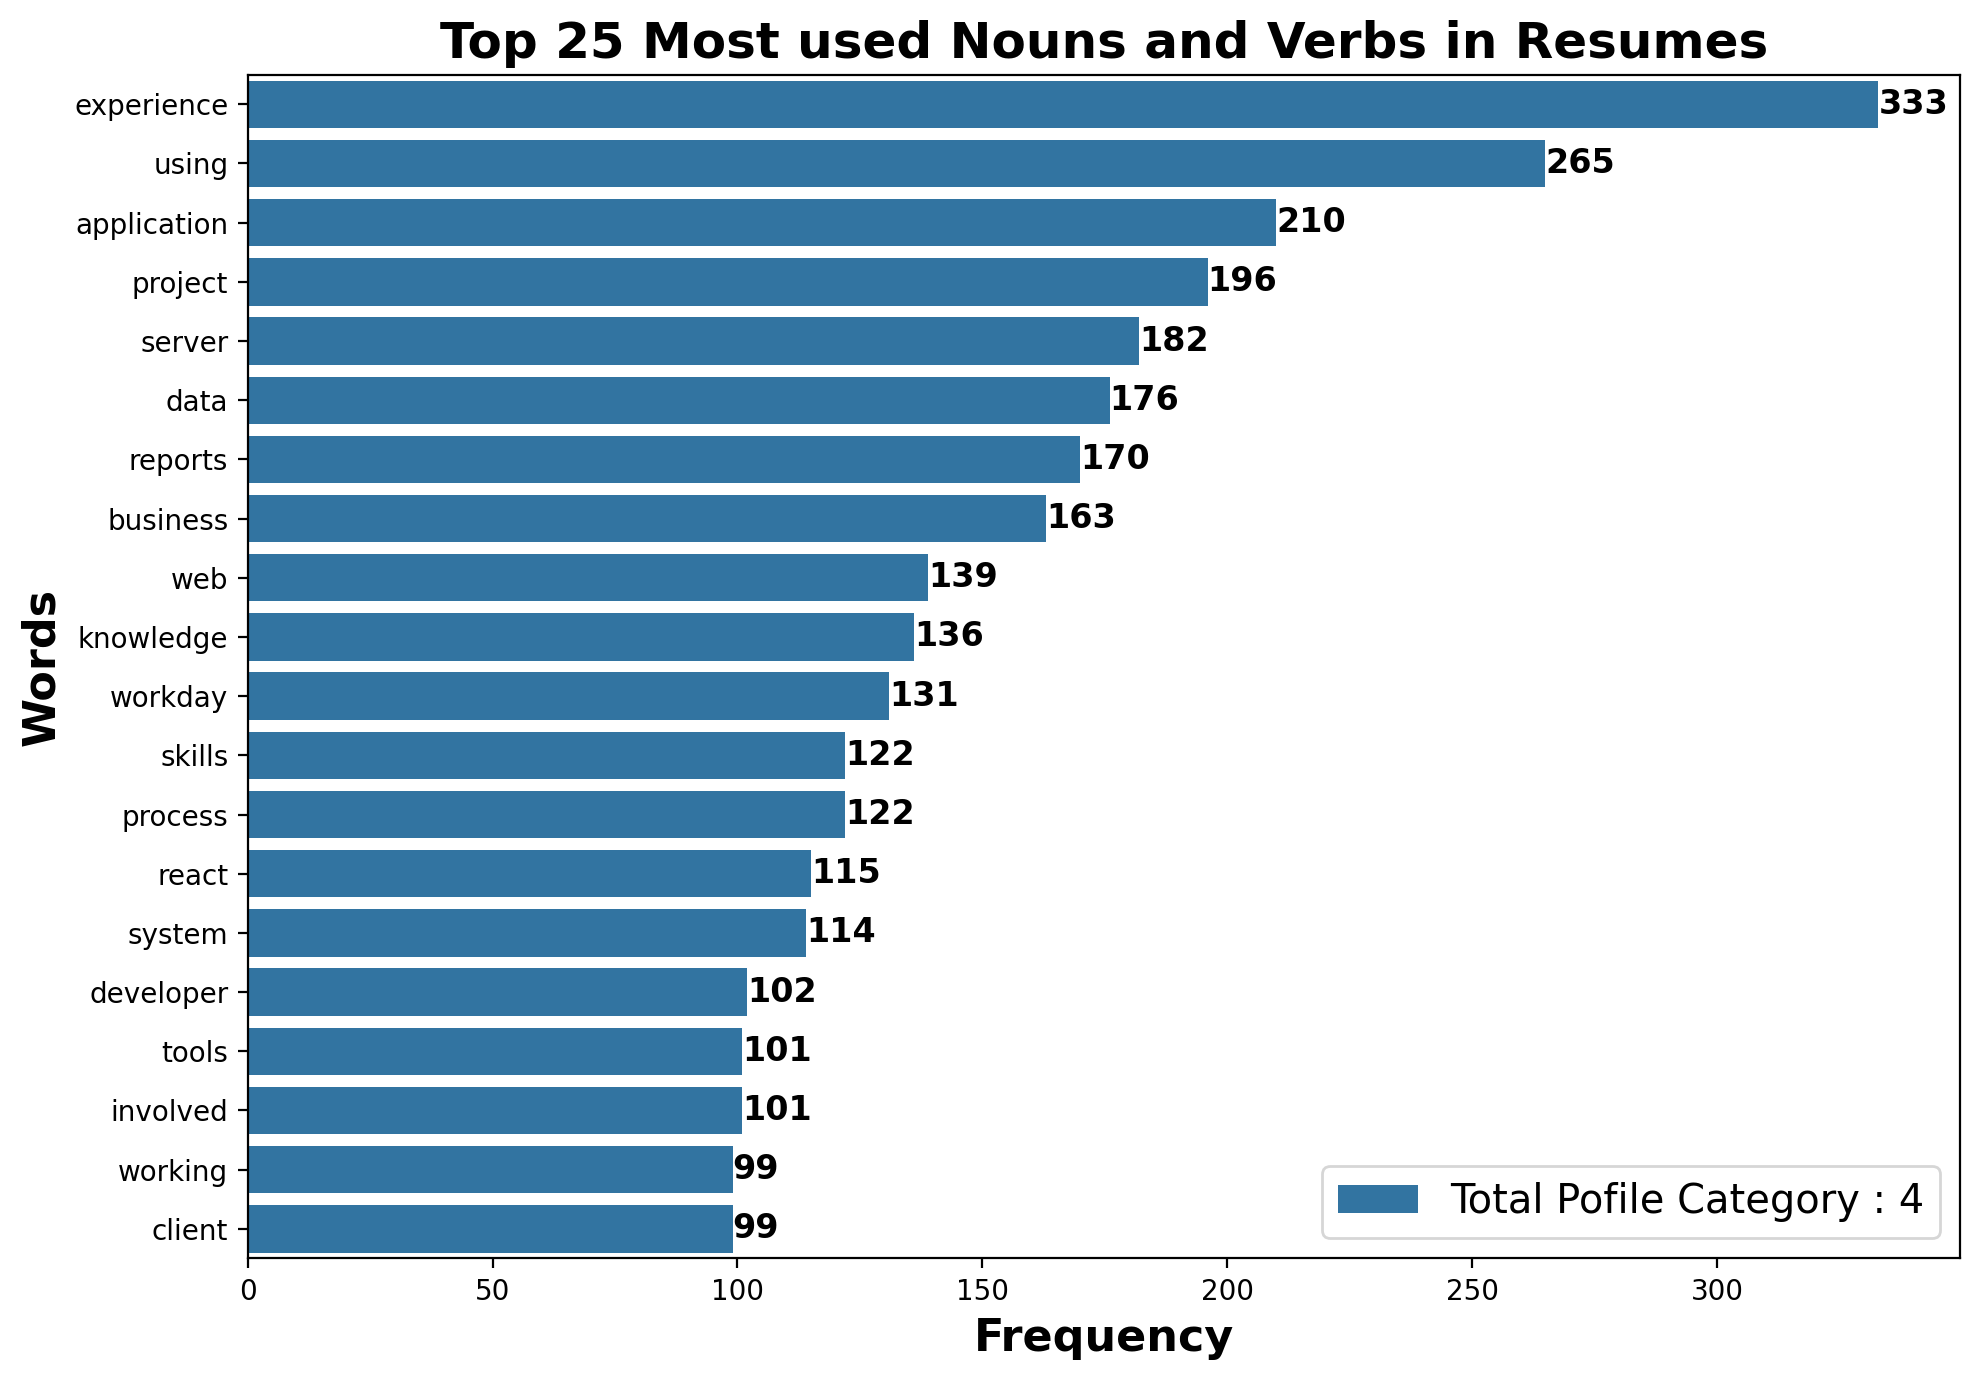

In [54]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
fig.tight_layout()
plt.show()

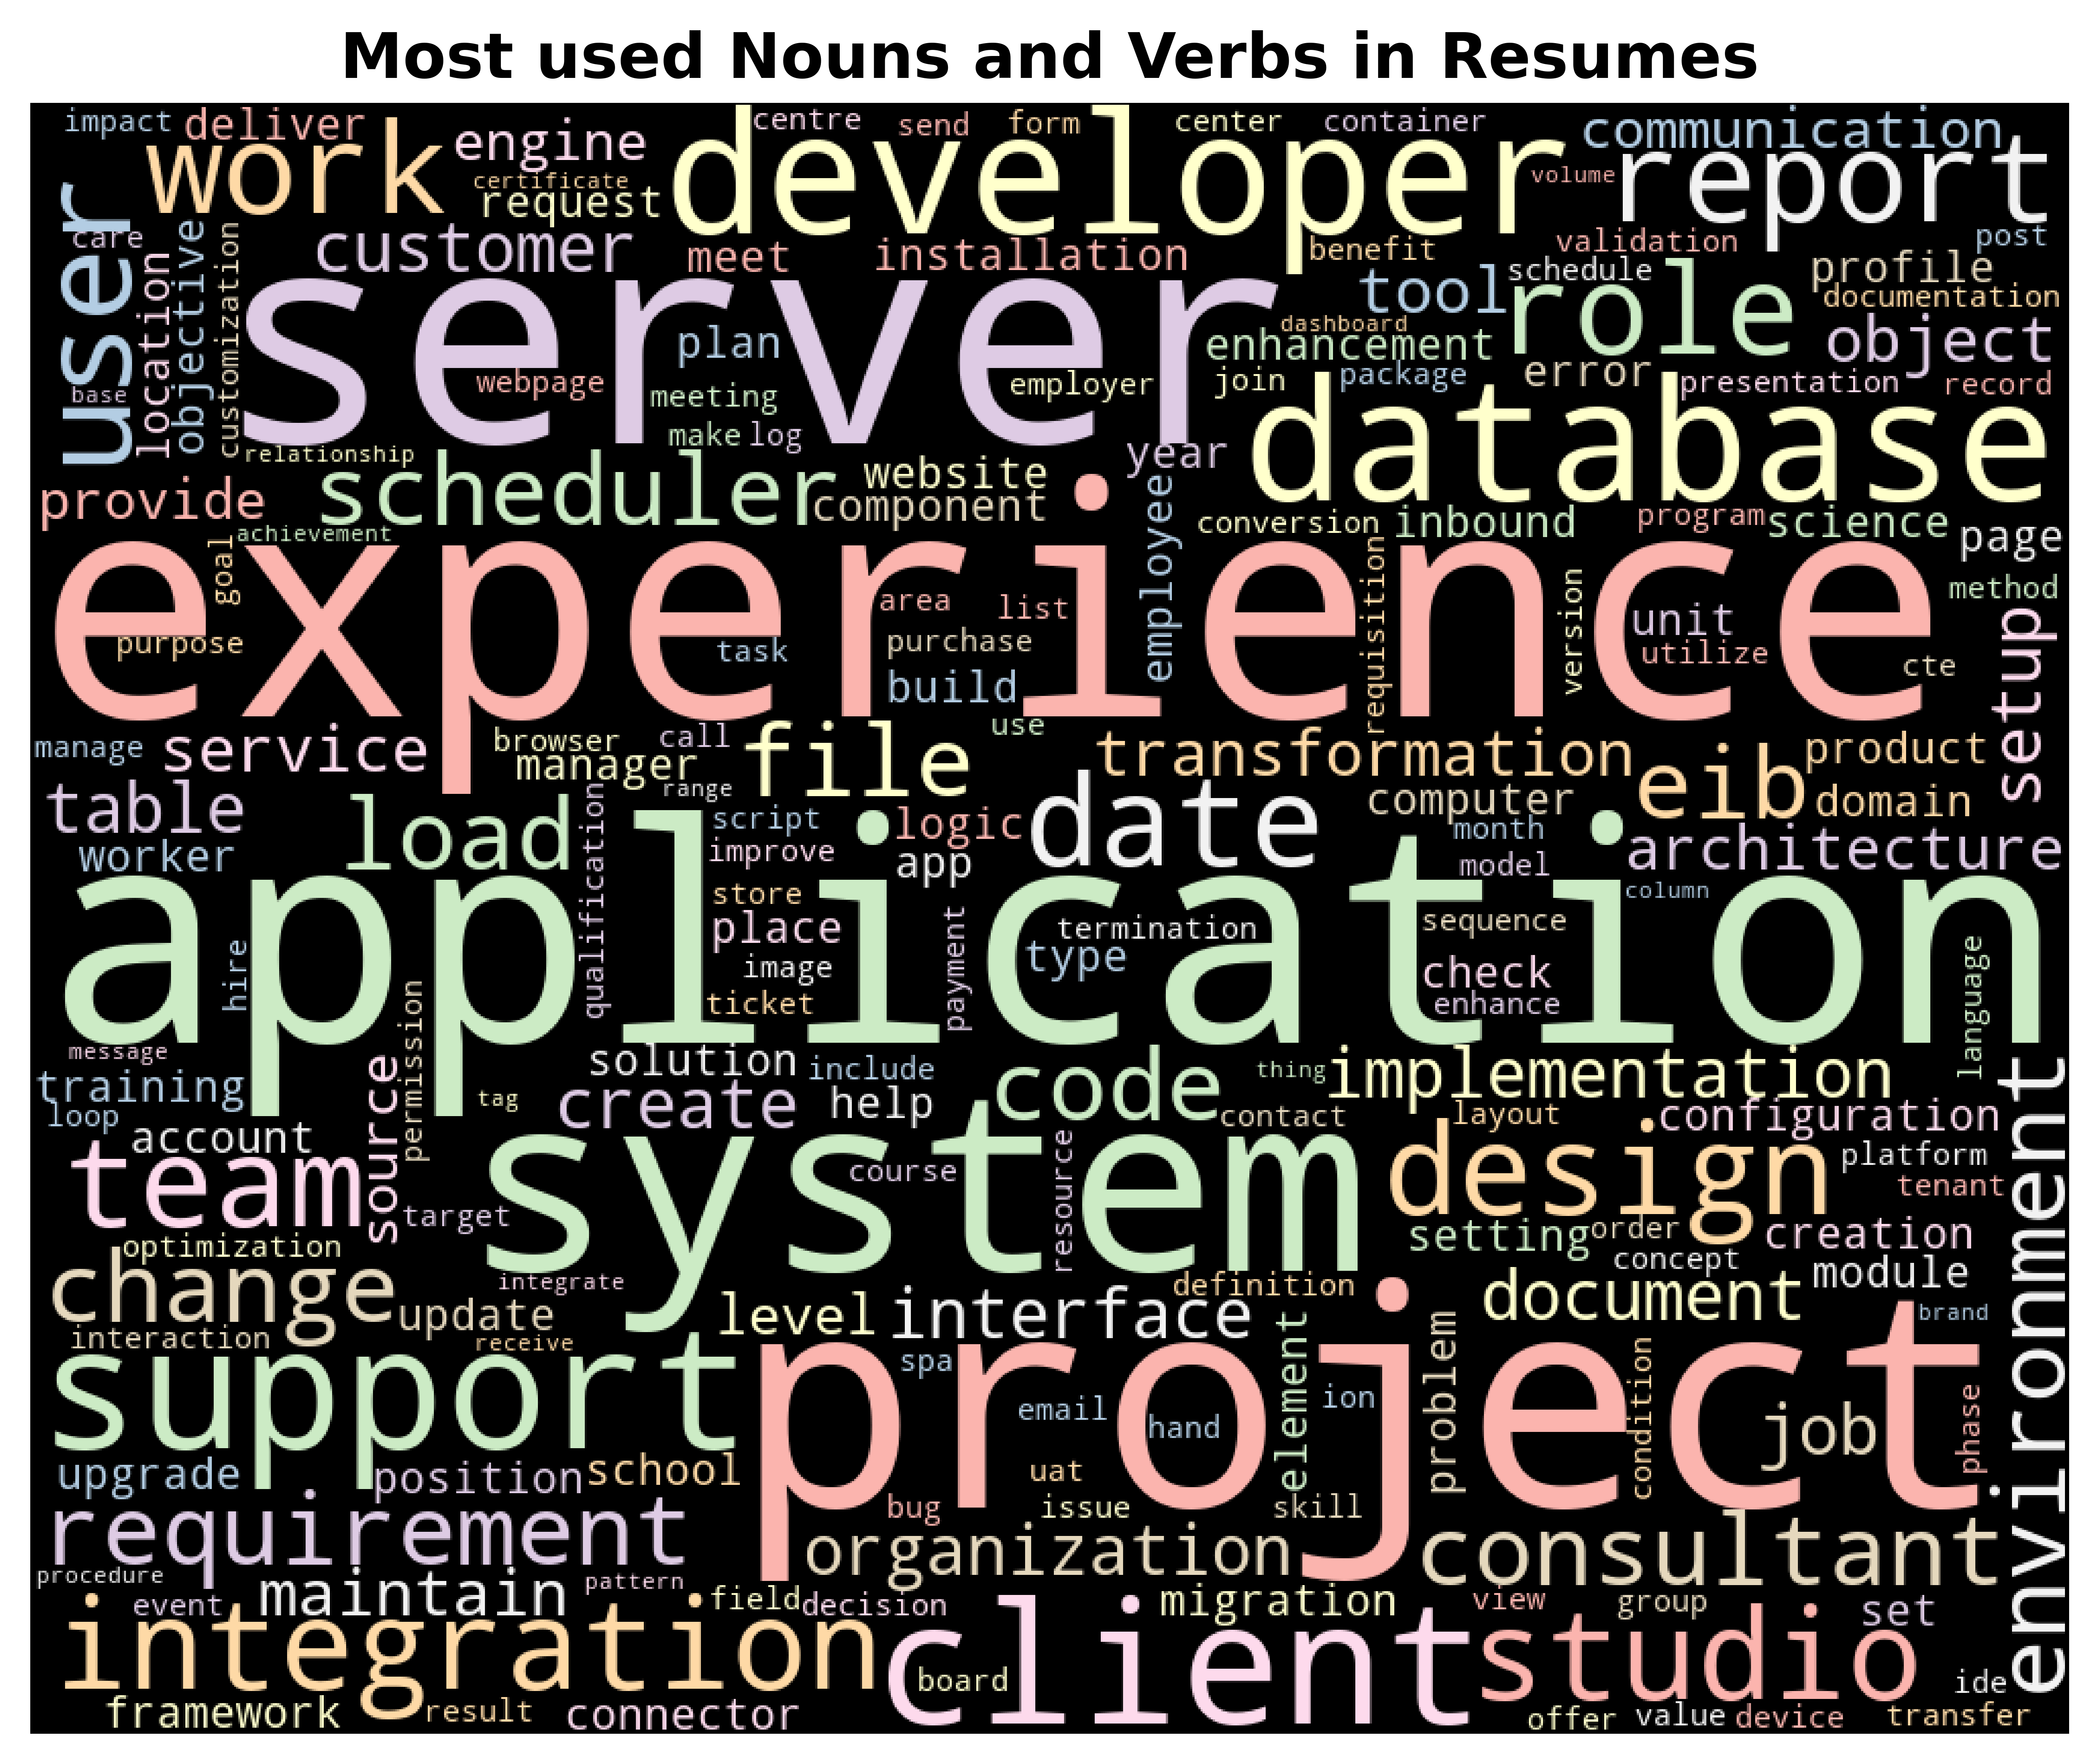

In [55]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

## Build a model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [57]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data.head()

,category,Resume_Details
0,Resumes,name ravali curriculum vitae specialization co...
1,Resumes,susovan bag seeking challenging position field...
2,Resumes,kanumuru deepak reddy career objective secure ...
3,Resumes,haripriya battina experience developer reactjs...
4,Resumes,kamalakar reddy linked professional summary ye...


##  Data Preprocessing

In [58]:
### LabelEncoder

In [59]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["category"])

resume_data

,category,Resume_Details,LebelEncoding
0,Resumes,name ravali curriculum vitae specialization co...,1
1,Resumes,susovan bag seeking challenging position field...,1
2,Resumes,kanumuru deepak reddy career objective secure ...,1
3,Resumes,haripriya battina experience developer reactjs...,1
4,Resumes,kamalakar reddy linked professional summary ye...,1
...,...,...,...
75,workday resumes,error reading doc file could find body element...,3
76,workday resumes,srikanth workday hcm consultant seeking suitab...,3
77,workday resumes,workday hcm fcm name kumar role workday consul...,3
78,workday resumes,error reading doc file could find main documen...,3


In [60]:
resume_data.describe()

,LebelEncoding
count,80.000000
mean,1.450000
std,1.135169
min,0.000000
25%,0.750000
50%,1.000000
75%,3.000000
max,3.000000


In [61]:
resume_data.isnull().sum()

category          0
Resume_Details    0
LebelEncoding     0
dtype: int64

##  Model Building

In [62]:
## Train - Test Split

In [63]:
x = resume_data['Resume_Details'].values
y = resume_data['category'].values

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((60,), (20,))

## TF-IDF Vectorization

In [65]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [66]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [67]:
x_train.shape, x_test.shape

((60, 2688), (20, 2688))

In [68]:
print(y_train),print(y_test)

['Peoplesoft resumes' 'Resumes' 'Peoplesoft resumes' 'workday resumes'
 'SQL Developer Lightning insight' 'SQL Developer Lightning insight'
 'Resumes' 'Peoplesoft resumes' 'Resumes' 'Peoplesoft resumes' 'Resumes'
 'SQL Developer Lightning insight' 'Resumes' 'Resumes' 'workday resumes'
 'Resumes' 'workday resumes' 'Resumes' 'Peoplesoft resumes' 'Resumes'
 'Resumes' 'workday resumes' 'Peoplesoft resumes' 'Peoplesoft resumes'
 'Peoplesoft resumes' 'Resumes' 'workday resumes' 'workday resumes'
 'SQL Developer Lightning insight' 'Resumes' 'workday resumes' 'Resumes'
 'SQL Developer Lightning insight' 'workday resumes' 'Resumes'
 'workday resumes' 'SQL Developer Lightning insight' 'workday resumes'
 'Peoplesoft resumes' 'Peoplesoft resumes'
 'SQL Developer Lightning insight' 'SQL Developer Lightning insight'
 'Peoplesoft resumes' 'workday resumes' 'SQL Developer Lightning insight'
 'Peoplesoft resumes' 'workday resumes' 'Peoplesoft resumes'
 'SQL Developer Lightning insight' 'workday resumes

(None, None)

## Classification Models

## KNN Classifier

In [69]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.42
Accuracy of  test set    : 0.35
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.00      0.00      0.00         5
                        Resumes       0.33      0.83      0.48         6
SQL Developer Lightning insight       0.00      0.00      0.00         4
                workday resumes       0.40      0.40      0.40         5

                       accuracy                           0.35        20
                      macro avg       0.18      0.31      0.22        20
                   weighted avg       0.20      0.35      0.24        20




## Decision Tree Classifier

In [70]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.78
Accuracy of  test set    : 0.75
Classification report for classifier DecisionTreeClassifier():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.50      0.60      0.55         5
                        Resumes       0.71      0.83      0.77         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      0.60      0.75         5

                       accuracy                           0.75        20
                      macro avg       0.80      0.76      0.77        20
                   weighted avg       0.79      0.75      0.75        20




## Random Forest Classifier

In [71]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.78
Accuracy of  test set    : 0.80
Classification report for classifier RandomForestClassifier(n_estimators=200):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.60      0.75         5
                        Resumes       1.00      0.83      0.91         6
SQL Developer Lightning insight       0.80      1.00      0.89         4
                workday resumes       0.57      0.80      0.67         5

                       accuracy                           0.80        20
                      macro avg       0.84      0.81      0.80        20
                   weighted avg       0.85      0.80      0.80        20




## Support Vectore Machine (SVM) Classifier

In [72]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.78
Accuracy of  test set    : 0.80
Classification report for classifier SVC():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.57      0.80      0.67         5
                        Resumes       0.83      0.83      0.83         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      0.60      0.75         5

                       accuracy                           0.80        20
                      macro avg       0.85      0.81      0.81        20
                   weighted avg       0.84      0.80      0.80        20




## Logistic Regression

In [73]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.78
Accuracy of  test set    : 0.85
Classification report for classifier LogisticRegression():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.67      0.80      0.73         5
                        Resumes       0.83      0.83      0.83         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      0.80      0.89         5

                       accuracy                           0.85        20
                      macro avg       0.88      0.86      0.86        20
                   weighted avg       0.87      0.85      0.85        20




## Bagging Classifier

In [74]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.75
Accuracy of  test set    : 0.85
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.62      1.00      0.77         5
                        Resumes       1.00      0.83      0.91         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      0.60      0.75         5

                       accuracy                           0.85        20
                      macro avg       0.91      0.86      0.86        20
                   weighted avg       0.91      0.85      0.85        20




## AdaBoost Classifier

In [75]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.78
Accuracy of  test set    : 0.90
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.71      1.00      0.83         5
                        Resumes       1.00      0.83      0.91         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      0.80      0.89         5

                       accuracy                           0.90        20
                      macro avg       0.93      0.91      0.91        20
                   weighted avg       0.93      0.90      0.90        20




## Gradient Boosting Classifier

In [76]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.78
Accuracy of  test set    : 0.85
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.62      1.00      0.77         5
                        Resumes       1.00      0.83      0.91         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      0.60      0.75         5

                       accuracy                           0.85        20
                      macro avg       0.91      0.86      0.86        20
                   weighted avg       0.91      0.85      0.85        20




## Naive Bayes Classifier

In [77]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.78
Accuracy of  test set    : 0.90
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.71      1.00      0.83         5
                        Resumes       1.00      0.83      0.91         6
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      0.80      0.89         5

                       accuracy                           0.90        20
                      macro avg       0.93      0.91      0.91        20
                   weighted avg       0.93      0.90      0.90        20




# Model Evaluation

In [78]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.416667,0.35,0.18,0.31,0.22
1,DecisionTree Classifier,0.783333,0.75,0.80,0.76,0.77
2,RandomForest Classifier,0.783333,0.80,0.84,0.81,0.80
3,SVM Classifier,0.783333,0.80,0.85,0.81,0.81
4,Logistic Regression,0.783333,0.85,0.88,0.86,0.86
5,Bagging Classifier,0.750000,0.85,0.91,0.86,0.86
6,AdaBoost Classifier,0.783333,0.90,0.93,0.91,0.91
7,Gradient Boosting Classifier,0.783333,0.85,0.91,0.86,0.86
8,Naive Bayes Classifier,0.783333,0.90,0.93,0.91,0.91


In [79]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

## Train and Test Accuracy Plot

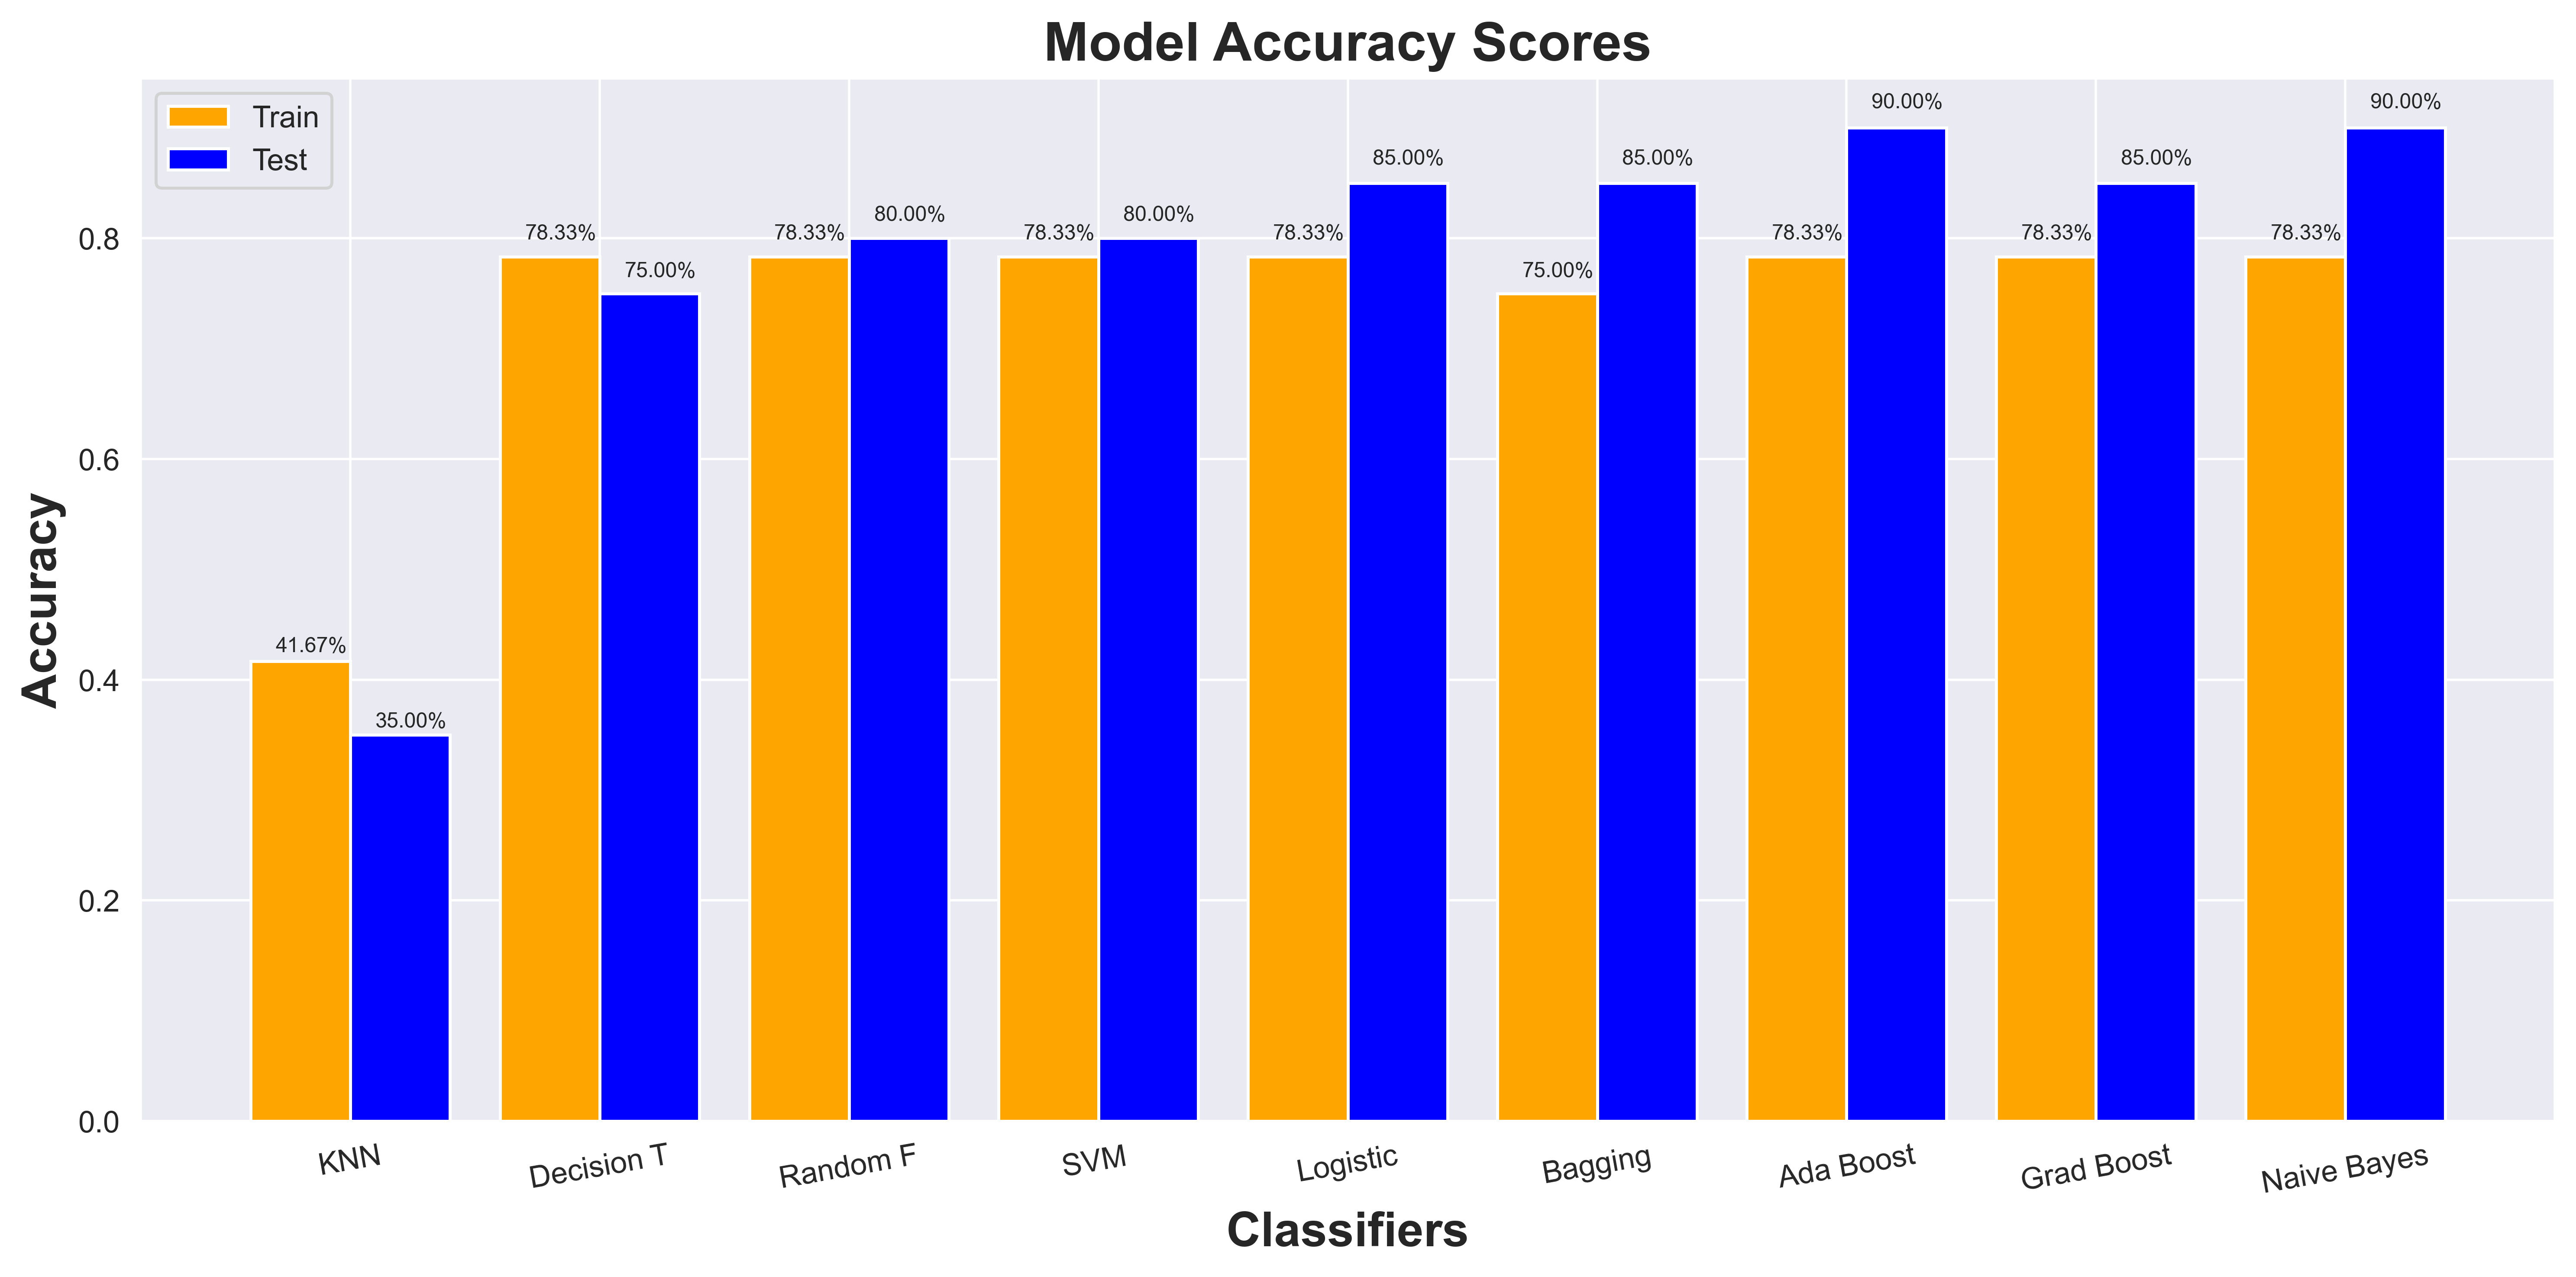

In [80]:
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

fig.tight_layout()
plt.show()

## Create a function to extract skills from cleaned text

In [81]:
## We will detect skills automatically using TF-IDF keywords

In [104]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def extract_top_keywords(resume_data, top_n=15):
    tfidf = TfidfVectorizer(stop_words='english', max_features=500)
    matrix = tfidf.fit_transform([resume_data])
    
    scores = zip(tfidf.get_feature_names_out(), matrix.toarray()[0])
    sorted_words = sorted(scores, key=lambda x: x[1], reverse=True)
    
    top_keywords = [word for word, score in sorted_words[:top_n]]
    return ", ".join(top_keywords)

In [105]:
resume_data['category']

0             Resumes
1             Resumes
2             Resumes
3             Resumes
4             Resumes
           ...       
75    workday resumes
76    workday resumes
77    workday resumes
78    workday resumes
79    workday resumes
Name: category, Length: 80, dtype: object

In [106]:
resume_data['Resume_Details']

0     name ravali curriculum vitae specialization co...
1     susovan bag seeking challenging position field...
2     kanumuru deepak reddy career objective secure ...
3     haripriya battina experience developer reactjs...
4     kamalakar reddy linked professional summary ye...
                            ...                        
75    error reading doc file could find body element...
76    srikanth workday hcm consultant seeking suitab...
77    workday hcm fcm name kumar role workday consul...
78    error reading doc file could find main documen...
79    vinay kumar workday functional consultant expe...
Name: Resume_Details, Length: 80, dtype: object

In [116]:
resume_data['skills'] = resume_data['Resume_Details'].apply(extract_top_keywords)
print(resume_data['skills'])

0     knowledge, good, testing, goo, test, meeting, ...
1     skills, using, css, html, management, books, d...
2     experience, traffic, using, development, good,...
3     project, html, technology, css, day, experienc...
4     hyderabad, css, html, javascript, technologies...
                            ...                        
75    file, body, doc, docx, element, error, reading...
76    workday, business, experience, hcm, security, ...
77    workday, using, custom, creating, reports, bus...
78    file, doc, document, docx, error, main, readin...
79    workday, business, integrations, reports, base...
Name: skills, Length: 80, dtype: object


In [129]:
resume_data = pd.read_csv(r"C:\Users\HP\skills.csv")
resume_data = resume_data.rename(columns={'skills ': 'skills'})
resume_data

,skills
0,abdul
1,ability
2,absence
3,academic
4,accounts
...,...
277,worked
278,workshop
279,xml
280,xslt


In [133]:
skills_series = resume_data['skills'].rename("skills")

In [134]:
df = pd.read_csv(r"C:\Users\HP\skills.csv")
df.columns = df.columns.str.strip()   # removes spaces from all column names

In [145]:
REAL_IT_SKILLS = {
    "python","java","javascript","jquery","html","css","bootstrap",
    "react","redux","angular","vue","node","nodejs","api","apis",
    "rest","restapi","soap","xml","xslt",
    "php","plsql","sql","mysql","oracle","mssql","redshift","ssis","ssrs",
    "mongodb","database","databases",
    "aws","azure","gcp","cloud","linux","unix",
    "docker","kubernetes","terraform","jenkins","git","github","gitlab",
    "power bi","tableau","excel",
    "etl","msbi","data","data analysis",
    "ml","machine learning","deep learning","nlp",
    "hadoop","spark",
    "sap","workday","peoplesoft","peopletools","ariba","salesforce",
}

In [151]:
import pandas as pd

# load your file
df = pd.read_csv(r"C:\Users\HP\skills.csv")

# normalize text
df['skills'] = df['skills'].str.lower().str.strip()

# keep only skills that match IT dictionary
df_filtered = df[df['skills'].isin(REAL_IT_SKILLS)]

# save output
df_filtered.to_csv("clean_it_skills.csv", index=False)

print(df_filtered)


          skills
12           api
18         ariba
24           aws
35     bootstrap
47         cloud
66           css
71          data
72      database
101          etl
102        excel
116       github
127         html
143         java
144   javascript
146       jquery
154        linux
164         msbi
165        mysql
172         node
177       oracle
185   peoplesoft
186  peopletools
190          php
193        plsql
209        react
213     redshift
214        redux
240          sql
241         ssis
242         ssrs
276      workday
279          xml
280         xslt


### Deployment

## Pickle File

In [87]:
import pickle
filename = 'modelDT.pkl'
pickle.dump(model_DT,open(filename,'wb'))

In [88]:
import pickle
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))